In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import CubicSpline
from sympy import E

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Benjamin Escobar Jaramillo
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [ ]:
def five_point_derivative(f,x,h):
  '''
  Calcula la derivada de la función f, en un conjunto de numeros x, con un paso de h.
  Variables:
    f: la función a derivar (calleable)
    x: los puntos a evaluar la derivada (array)
    h: el paso entre puntos x (float)
  retorna un array con las derivadas en los puntos proporcionados.
  '''

  x=np.sort(x)  #Aqui garantizo que x[0] es el primer punto, y que x[len(x)-1] es el ultimo! (no sea que nos den un array desordenado!)

  n=len(x) # asi vamos a recorrer x;
  derivadas=np.zeros_like(x) #Y aqui guardaremos nuestras derivadas (consume menos que las listas!)

  for i in range(n):


    if i==0:        #A) Foward!
      derivadas[i]=(-25*f(x[i]) + 48*f(x[i]+h) -36*f(x[i]+2*h) +16*f(x[i]+3*h) - 3*f(x[i]+4*h) )/(12*h)
    elif i==1: #A) Otra vez... Foward? Por supuesto! pues center necesita almenos 2 puntos atrás! asi que si, de nuevo foward
      derivadas[i]=((-25*f(x[i]) + 48*f(x[i]+h) -36*f(x[i]+2*h) +16*f(x[i]+3*h) - 3*f(x[i]+4*h) )/(12*h))



    elif i==n-2:  #B) Backward; igual que foward, vamos con atras desde el penultimo, pues center, necesita almenos 2 puntos adelante!
      derivadas[i]=(25*f(x[i]) - 48*f(x[i]-h) + 36*f(x[i]-2*h) - 16*f(x[i]-3*h) + 3*f(x[i]-4*h) )/(12*h)
    elif i==n-1: #B) y ahora si, el ultimo punto! (igual; backward)
      derivadas[i]=(25*f(x[i]) - 48*f(x[i]-h) + 36*f(x[i]-2*h) - 16*f(x[i]-3*h) + 3*f(x[i]-4*h) )/(12*h)

      #Y logicamente, si no es ni adelante y atrás, todo lo demas será center!
    else:
      derivadas[i]=((f(x[i]-2*h) - 8*f(x[i]-h) + 8*f(x[i]+h) -f(x[i]+2*h) )/(12*h))

  return derivadas #Y devuelve nuestro arreglo de derivadas!

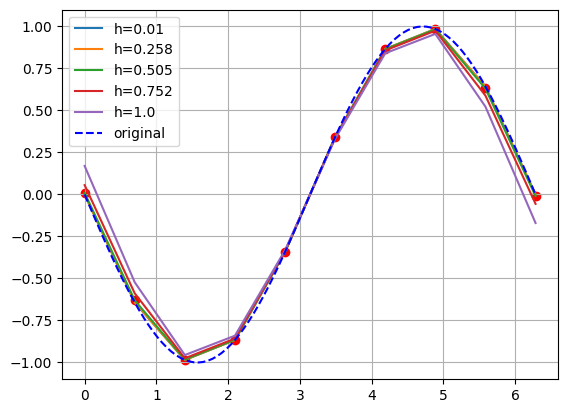

In [ ]:
xpi=np.linspace(0,2*np.pi,10) #Aqui nos vamos a mover
hs=np.linspace(0.01,1,5) #Variemos el h 2 ordenes de magnitud!

xcompleto=np.linspace(0,2*np.pi,100) #Y este es para la grafica original

f=lambda x: np.cos(x)       #La original
df=lambda x: -np.sin(x)     #La derivada

for i in hs: #Y un ciclo para visualizar la evolución con el cambio de h's
  plt.plot(xpi, five_point_derivative(f,xpi,i), label=(f'h={round(i,3)}') )
plt.plot(xcompleto,df(xcompleto),label=('original'),c='b',ls='--')
plt.legend()
plt.scatter(xpi,five_point_derivative(f,xpi,0.5),c='r')
plt.grid()


Text(0, 0.5, '$Error$(%)')

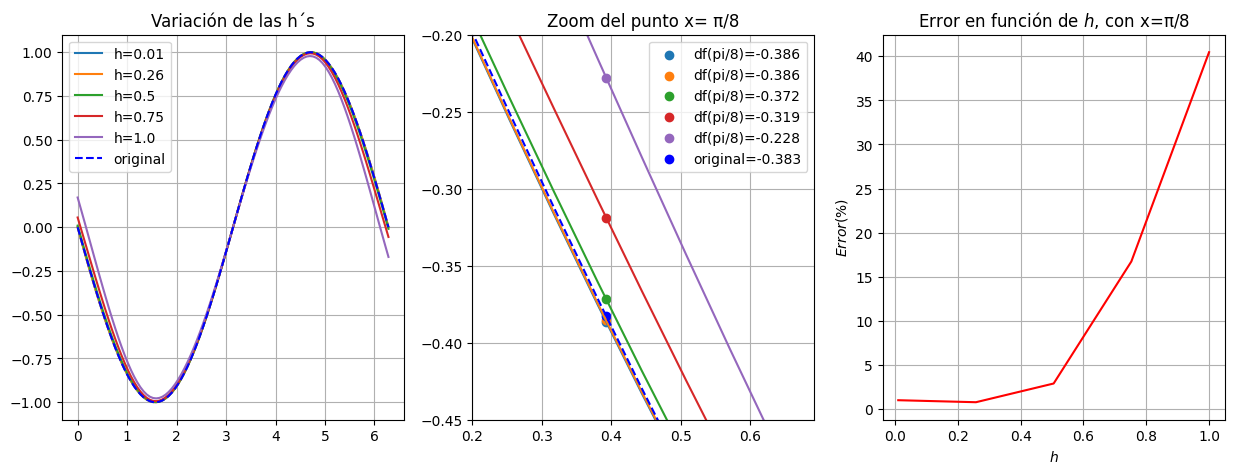

In [ ]:
#Como era lógico, nos vamos acercando cada vez màs a la gráfica original con un h menor.
'''
Bien, ahora encontremos fprime en pi/8, y veamos el error variando el h (quien, con la gráfica anterior, ya nos podemos hacer una idea)
Plan?
Es cierto que podemos separar foward, backward y centro, sin embargo, note la siguiente perspectiva:
Nuestra función nos devuelve un array con los VALORES de las derivadas en los puntos. no es una función per se, y pi/8 no esta
en nuestros puntos! ¿Que podriamos hacer...? Tenemos un conjunto de puntos x, & otro de puntos y... suena acaso familiar?
Interpolación! Asi tendremos una función asociada, y además, la podremos evaluar en CUALQUIER punto! (del intervalo)
'''
hs=np.linspace(0.01,1,5) #Misma variación del h(Para comparar!)


fig,ax=plt.subplots(1,3,figsize=(15,5)) #El primer subplot es analogo a la grafica anterior, pero en nuestra version FUNCIONAL! (f(x))
for i in hs:
  derivadainterpol=CubicSpline(xpi,five_point_derivative(f,xpi,i))
  ax[0].plot(xcompleto,derivadainterpol(xcompleto),label=f'h={round(i,2)}')
ax[0].plot(xcompleto,df(xcompleto),label=('original'),c='b',ls='--')
ax[0].set(
    title=('Variación de las h´s'),)
ax[0].legend()
ax[0].grid()

for i in hs:#Nuestro segundo subplot, es un zoom, para ver como cambia el valor pi/8, a medida que disminuimos el h (mayor precision!)
  derivadainterpol=CubicSpline(xpi,five_point_derivative(f,xpi,i))
  ax[1].plot(xcompleto,derivadainterpol(xcompleto))
  ax[1].scatter(np.pi/8,derivadainterpol(np.pi/8),label=f'df(pi/8)={round(float(derivadainterpol(np.pi/8)),3)}')


ax[1].plot(xcompleto,df(xcompleto),c='b',ls='--')
ax[1].scatter(np.pi/8,df(np.pi/8),label=(f'original={round(df(np.pi/8),3)}'),c='b')
ax[1].set(
    title=('Zoom del punto x= π/8'))
ax[1].set_ylim(-0.45, -0.2)
ax[1].set_xlim(0.2,(np.pi/8)+0.3)
ax[1].legend()
ax[1].grid()


error=[] #y nuestro ultimo subplot es calcular el error, a medida que h varía!
for i in hs:
  derivadainterpol=CubicSpline(xpi,five_point_derivative(f,xpi,i))
  error.append( (abs( df(np.pi/8) - derivadainterpol(np.pi/8)  ))/abs((df(np.pi/8))) *100 ) #Hagamos un error porcentual!!!
ax[2].plot(hs,error,c='r')
ax[2].set(title='Error en función de $h$, con x=π/8')
ax[2].grid()
ax[2].set_xlabel('$h$')
ax[2].set_ylabel('$Error$(%)')

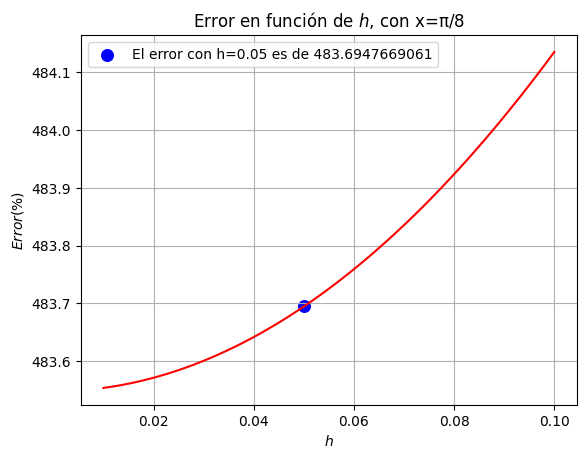

In [ ]:
'''
Bien, ya que visualizamos estos cambios, tenemos una tendencia a creer que menores h's, sin duda proporcionan mayor precisión.
Calculemos entonces f''(x), con h=0.05, y nuevamente variemos el h para ver que pasa

Plan! Empleemos el metodo de segunda derivada con diferencias finitas!
'''
def fpp(f,x,h):
  '''
  Aproxima la segunda derivada de la función con el metodo de diferencias finitas (center)
    f: funcion (calleable)
    x: El punto! (float)
    h: El paso (float)
  Return: La segunda derivada en el punto.
  '''

  return ( (f(x+h)-2*f(x)+f(x-h))/(h**2) )

ddf=lambda x: -np.cos(x) #La segunda derivada de coseno! (para comparar)
#Y ahora, a calcular el error!


hs=np.linspace(0.01,0.1,100)
error=[] #hacemos un metodo similar
for i in hs:
  error.append( (abs( ddf(np.pi/8) - fpp(f,np.pi/8,i)  ))/abs((ddf(np.pi/8))) *100)

plt.plot(hs,error,c='r')

plt.scatter(0.05,( (abs( ddf(np.pi/8) - fpp(f,np.pi/8,0.05)  ))/abs((ddf(np.pi/8)))*100),s=70,c='b',
            label=f'El error con h=0.05 es de {round((abs( ddf(np.pi/8) - fpp(f,np.pi/8,0.05)  ))/abs((ddf(np.pi/8))) *100 ,10)}')
plt.title('Error en función de $h$, con x=π/8')
plt.grid()
plt.xlabel('$h$')
plt.ylabel('$Error$(%)')
plt.legend()

In [ ]:
'''
Como podemos observar, tal como nuestras sospechas nos llevaron, el error aumenta, con h's mas grandes, por lo cual,
tenderemos mejores resultados si nuestro h es realmente pequeño (Como la definición matemática de derivada, donde h
tiende a 0)

Ahora, para concluir, simplemente resta expresar explicitamente el valor de la segunda derivada aproximada en x=π/8
'''
print(f'f"(π/8), con nuestra aproximacion con h=0.05 es {fpp(f,np.pi/8,0.05)}')
print(f'Mientras que el valor real es {ddf(np.pi/8)}')
print(f'Obteniendo entonces, una diferencia absoluta de {round(abs(fpp(f,np.pi/8,0.05) -ddf(np.pi/8) ),4)} (qué cercanos!)')

f"(π/8), con nuestra aproximacion con h=0.05 es 3.544877418761904
Mientras que el valor real es -0.9238795325112867
Obteniendo entonces, una diferencia absoluta de 4.4688 (qué cercanos!)


#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

In [ ]:
'''
Bien! Comencemos sencillo, el plan es el siguiente;
a) definimos la función f.
b) Empleamos diferencias finitas para f'(x) (Pues muy convenientemente ya tenemos diferencias finitas para f''(x)) (punto anterior)
c) a traves del arreglo, comparamos!
'''
xp=np.linspace(1.8,2.2,6) #nuestros 6 puntos, bien!

f=lambda x: x*np.exp(x) #Definimos la función

def difinitas(f,x,h):
  '''
  Calcula las diferencias finitas, empleando; atras, adelante y centro.
    f: Función numérica
    x: array
    h: float

  Return: fprime(derivada)
  '''

  n=len(x)
  fprime=np.zeros_like(x,dtype=float)  #Empleamos el mismo procedimiento que en 5 puntos.

  for i in range(n):

    if min(x)==x[i]:            #Para variar, usemos min y max, asi garantizamos que funcione sin importar el orden del arreglo!
      fprime[i]= ((  (f(x[i]+h) - f(x[i]))   / h))

    elif max(x)==x[i]:
      fprime[i]=((  (  f(x[i]) - f(x[i]-h)  ) / h))

    else:
      fprime[i]=(( ( (f(x[i]+h)) - (f(x[i]-h))   ) )/(2*h))

  return fprime


In [ ]:
'''
Bien, ya tenemos la función, y nuestras diferencias finitas. Calculemos nuestro valor
'''
x=[2] #Para "Forzar" el funcionamiento de difinitas con un único punto. (recibe por naturaleza arrays!)

print(f'La derivada aproximada tiene un valor de {difinitas(f,x,0.05)}, mientras que la segunda derivada de {fpp(f,2,0.05)}')


La derivada aproximada tiene un valor de [22.9217014], mientras que la segunda derivada de 29.56546174215901


[Text(0.5, 1.0, 'Segunda derivada')]

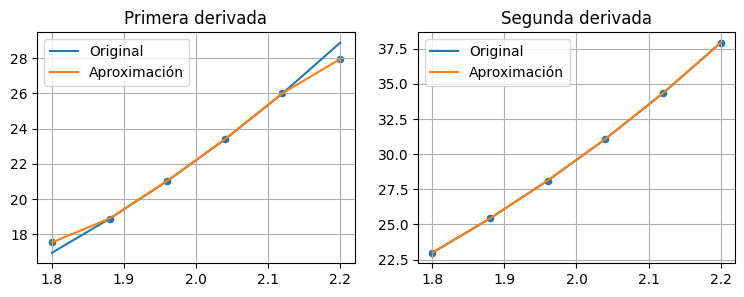

In [ ]:
'''
Perfecto! Observemos entonces nuestras aproximaciones con respecto a la función original! Para ello, usemos... Simpy!
de este modo, comparar con valores exactos.
'''

f=lambda x: x*np.exp(x) #Recordemos la función original

x=sp.symbols('x')

fx=x*E**x   #Bien, ya tenemos la función, hallemos su derivada.
dfx=sp.diff(fx,x) #Nuestra primera derivada
ddfx=sp.diff(fx,x,2) #y nuestra segunda derivada!!

dydx=sp.lambdify(x,dfx)           #Y las transformamos en útiles funciones lambda
dobledydx=sp.lambdify(x,ddfx)  #Pefecto! Ahora vamonos a graficar!




xp=np.linspace(1.8,2.2,6) #Acà esta nuestro arreglo de 6 puntos
fig,ax=plt.subplots(1,2,figsize=(9,3)) #Y simplemente, para este ejemplo decidimos un h estandar de 0.05

ax[0].plot(xp,dydx(xp),label='Original')
ax[0].plot(xp,difinitas(f,xp,0.05),label='Aproximación')
ax[0].legend()
ax[0].scatter(xp,difinitas(f,xp,0.05),s=20)
ax[0].grid()
ax[0].set(
    title=('Primera derivada'))

ax[1].plot(xp,dobledydx(xp),label='Original')
ax[1].plot(xp,fpp(f,xp,0.05),label='Aproximación')
ax[1].scatter(xp,fpp(f,xp,0.05),s=20)
ax[1].legend()
ax[1].grid()
ax[1].set(
    title=('Segunda derivada'))

In [ ]:
'''
Notese las clásicas colitas de las diferencias finitas en la primera derivada, dada su definición! que puede mejorar con h's
mas pequeños (Pruebelo usted mismo;notarà que al hacer h`s muy pequeños, estas colitas desaparecen!). Por el otro lado,
como construimos la función de la segunda derivada, esta no calcula extremos ni cotas, sino el punto especifico per se,
por ello da la impresión de mayor precisión, pero esto tambien influye en el caracter de la función
'''

[Text(0.5, 1.0, 'Error (log)'), Text(0.5, 0, 'H'), Text(0, 0.5, 'Error')]

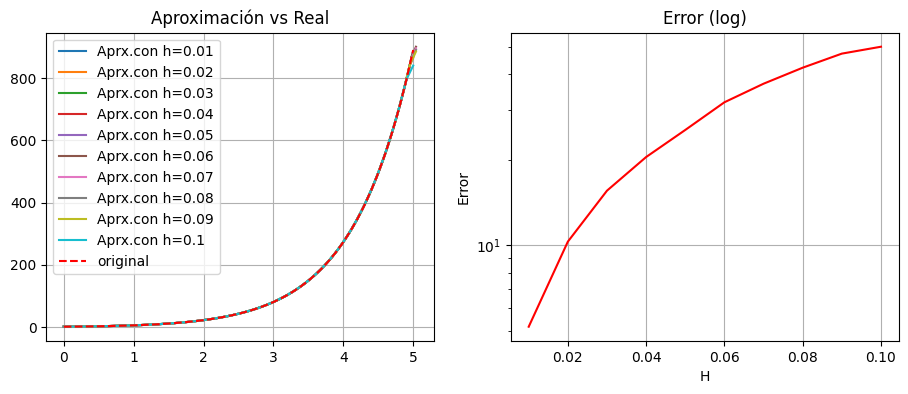

In [ ]:
'''
Bien, ya vimos todos estos metodos curiosos! es hora de emplear las funciones asociadas, esto es: Gradient!!!
Observemos entonces como se comporta su precisión, cambiando los h's, y hallando un limite optimo.
'''
#A) Hacer una lista, con nuestra separación de h`s!
#A diferencia de nuestras funciones anteriores, donde teniamos un h predispuesto en la función, aquí estarà definido es en la lista
#De modo que las separaciones sean a causa de los intervalos formados por np.arange!

#Ahora bien, que necesita gradient? sencillo, los x's, los f(x's), y... nada màs! asi que, variemos esos h's



hss=np.linspace(0.01,0.1,10) #Diez valores donde puede variar el h
realx=np.linspace(0,5,100) #con este calculamos las originales (para la derivada)

error=[] #y aqui introducimos nuestras diferencias absolutas
fig,ax=plt.subplots(1,2,figsize=(11,4)) #para el futuro! (ya verás!)
for i in hss:
  x = np.arange(0, 5 + i, i) #Aqui varamos nuestros intervalos con sus rangos! (digamos con x de 0 a 5)
  y= f(x)
  gradientes=np.gradient(f(x),x)         #Entonces aca, acabamos de formar un array de los dydx! entonces con estos puntos...
  funciongradiente=CubicSpline(x,gradientes) #Por lo cual, tenemos una función del gradiente con el h del momento!!!!!
  '''
  Asi que el plan es el siguiente; para estandarizar el error, necesitamos una diferencia. para hallar el error màximo, hagamos
  una resta de todos los valores del intervalo, y seleccionamos el mas grande! luego, buscamos el mayor de todos estos, y así,
  obtenemos el mayor error posible. por lo cual, aun dentro del for, realizamos el siguiente procedimiento.
  '''
  diferencias=(abs(funciongradiente(x)-dydx(x))) #restamos la aproximacion con la original
  errormax=np.max(diferencias) #hallamos el mayor
  error.append(errormax)        # se lo restamos! y voilà! Tenemos nuestra lista de errores
  ax[0].plot(x,funciongradiente(x),label=f'Aprx.con h={round(i,6)}')
ax[0].plot(x,dydx(x),color='r',ls='--',label='original')   #Ahora, grafiquemos la comparación de los gradientes con la original
ax[0].legend()
ax[0].grid()
ax[0].set(
    title=('Aproximación vs Real')
)

ax[1].set_yscale('log')        #Y ahora, la gráfica logaritmica del error!
ax[1].plot(hss,error,color='r')
ax[1].grid()
ax[1].set(
    title=('Error (log)'),
    xlabel=('H'),
    ylabel=('Error')
)

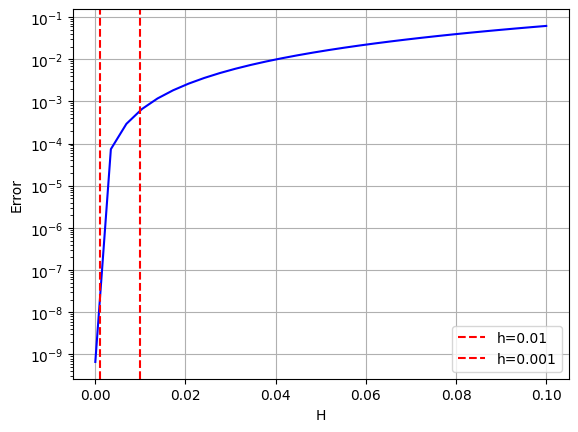

In [ ]:
'''
Ahora, vamos a realizar nuevamente la gràfica del error, pero no tomando el error maximo (que sospechamos que
suele tomarlas colitas extremas), sino que midamos en un número intermedio, como el 2! tal vez alli, podamos observar
una mejor tendencia del error
'''
hss=np.linspace(0.00001,0.1,30) #Tomamos todo igual pero... agreguemos mas valores! para mas precisión...
realx=np.linspace(0,5,100)

error=[] #misma idea
for i in hss:
  x = np.arange(0, 5 + i, i)
  y= f(x)
  gradientes=np.gradient(f(x),x)
  funciongradiente=CubicSpline(x,gradientes) #nada diferente... pero lo que viene!
  error.append((abs(funciongradiente(2)-dydx(2)))) #Ah-Ha! Aqui radica la diferencia. Solo vamos a observar el error en este punto

plt.plot(hss,error,c='b')
plt.yscale('log')
plt.xlabel('H')
plt.ylabel('Error')
plt.axvline(0.01,color='r',ls='--',label='h=0.01')
plt.axvline(0.001,color='r',ls='--',label='h=0.001')
plt.grid()
plt.legend()

In [ ]:
'''
Conclusiones!!!
En el gráfico anterior, en vez de ir de 0.01 a 0.1, se decidió comenzar en 0.00001, para tener una mejor visualización inicial.
de igual manera, se agregaron mas puntos, nuevamente para una mejor observacion (30 puntos).
Note que, se decidió remarcar el caso, cuando h=0.01. Como podemos observar, a partir de este valor, obtenemos un error,
en forma de diferencia absoluta menor a 10^-3, es decir, a partir de este h hacia abajo, la convergencia es bastante aceptable,
sin embargo, solo con un orden de magnitud menos, es decir, h=0.001, noten como nuestra convergencia es ridiculamente buena!!
estamos en tolerancias de 10^-8! En estos valores tenemos numeros muy precisos, por lo cual podriamos decir que con un h=10^-3,
tenemos valores muy precisos, y podriamos tomarlo como un muy buen valor estandar para h.

np.float64(22.16716829679195)